In [1]:
from google.colab import drive
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import datetime
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/train3.csv')
test = pd.read_csv('/content/gdrive/MyDrive/test3.csv')

In [4]:
print("train data shape: ",train.shape)
print("Test data shape: ",test.shape)

train data shape:  (150150, 9)
Test data shape:  (13860, 8)


In [5]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


**Change week to date time**

In [6]:
train['week'] = pd.to_datetime(train['week'])
test['week'] = pd.to_datetime(test['week'])

**Data Analysis**

In [7]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [8]:
test.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

**To Check if dataset is balanced**

In [9]:
train.apply(lambda x: len(x.unique()))

record_ID          150150
week                  130
store_id               76
sku_id                 28
total_price           647
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64

In [10]:
test.apply(lambda x: len(x.unique()))

record_ID          13860
week                  12
store_id              76
sku_id                28
total_price          442
base_price           370
is_featured_sku        2
is_display_sku         2
dtype: int64

In [11]:
print(train['is_featured_sku'].value_counts()/train['is_featured_sku'].shape[0])

print(test['is_featured_sku'].value_counts()/test['is_featured_sku'].shape[0])

0    0.904389
1    0.095611
Name: is_featured_sku, dtype: float64
0    0.91342
1    0.08658
Name: is_featured_sku, dtype: float64


In [12]:
print(train['is_display_sku'].value_counts()/train['is_display_sku'].shape[0])

print(test['is_display_sku'].value_counts()/test['is_display_sku'].shape[0])


0    0.8668
1    0.1332
Name: is_display_sku, dtype: float64
0    0.866667
1    0.133333
Name: is_display_sku, dtype: float64


**Conclusion : Dataset is balanced**

In [13]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   record_ID        13860 non-null  int64         
 1   week             13860 non-null  datetime64[ns]
 2   store_id         13860 non-null  int64         
 3   sku_id           13860 non-null  int64         
 4   total_price      13860 non-null  float64       
 5   base_price       13860 non-null  float64       
 6   is_featured_sku  13860 non-null  int64         
 7   is_display_sku   13860 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 866.4 KB


In [15]:
train.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold'],
      dtype='object')

# **Data Visualization**

Text(0, 0.5, 'units_sold')

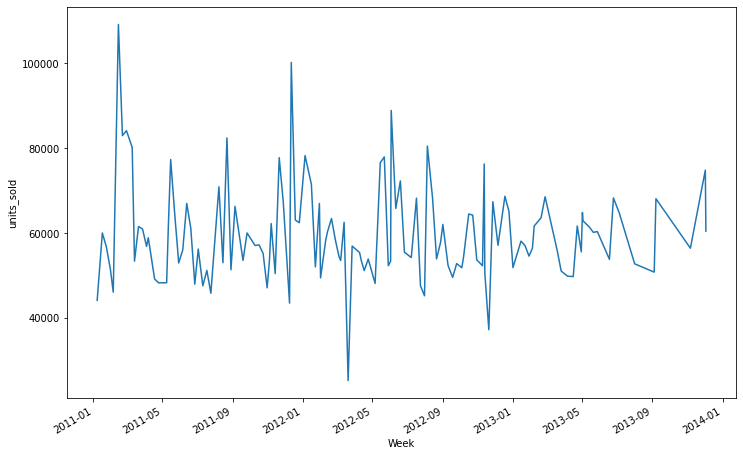

In [16]:
train.groupby('week').sum()['units_sold'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('units_sold')

Text(0, 0.5, 'total_price')

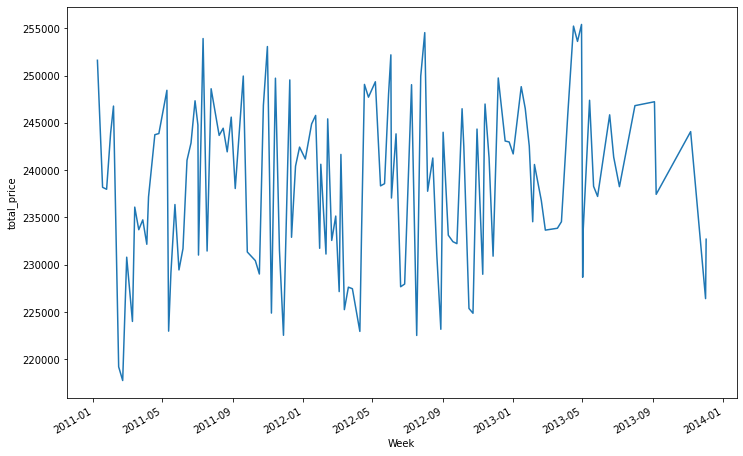

In [17]:
train.groupby('week').sum()['total_price'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('total_price')

Text(0, 0.5, 'units_sold')

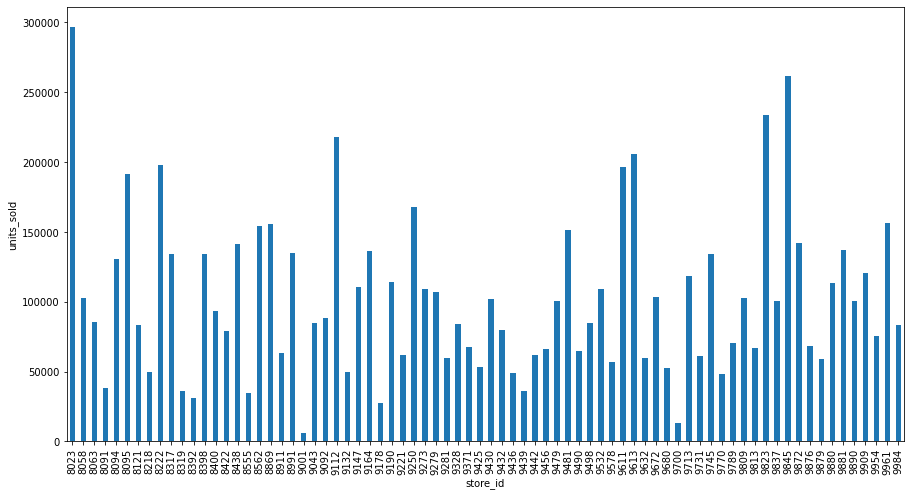

In [18]:
train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')
plt.xlabel('store_id')
plt.ylabel('units_sold')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


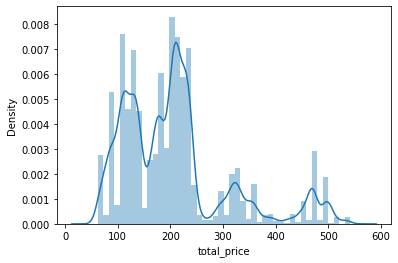

In [19]:
import seaborn as sns
sns.distplot(train['total_price'])

# **Handling Missing Values**

In [20]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [21]:
train[train['total_price'].isna() == True]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,2013-04-23,9436,245338,NaN,469.5375,0,0,1


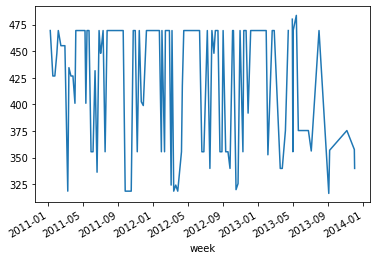

In [22]:
train[(train['store_id']==9436) & (train['sku_id']==245338) ].set_index('week')['total_price'].plot()

In [23]:
train[(train['store_id']==9436) & (train['sku_id']==245338) & (train['week'] >= datetime.datetime.strptime('2013-04-23', '%Y-%M-%d'))]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
119624,169396,2013-08-01,9436,245338,469.5375,469.5375,0,0,7
123089,174299,2013-01-29,9436,245338,469.5375,469.5375,0,0,4
124244,175917,2013-05-02,9436,245338,355.5375,469.5375,0,1,20
125399,177544,2013-12-02,9436,245338,357.6750,469.5375,1,1,67
126554,179175,2013-02-19,9436,245338,469.5375,469.5375,0,0,7
127709,180808,2013-02-26,9436,245338,469.5375,469.5375,0,0,9
128864,182447,2013-05-03,9436,245338,469.5375,469.5375,0,0,4
130019,184085,2013-12-03,9436,245338,339.8625,469.5375,1,0,33
131174,185728,2013-03-19,9436,245338,339.8625,469.5375,1,1,30
132329,187366,2013-03-26,9436,245338,339.8625,469.5375,1,1,16


In [24]:
train = train.fillna(475)

In [25]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

# **Preprocessing**

In [41]:
df1 = train.append(test)

In [42]:
df1.shape

(164010, 9)

In [44]:
column=['sku_id','store_id']
name='count_id_sku_store'
temp=df1.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df1 = pd.merge(df1,temp,how = 'left',on = column)
df1[name] = df1[name].astype(float)
df1[name].fillna(np.median(temp[name]),inplace=True)

In [45]:
column = ['sku_id']
name='count_id_sku'
temp=df1.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df1 = pd.merge(df1,temp,how = 'left',on = column)
df1[name] = df[name].astype(float)
df1[name].fillna(np.median(temp[name]),inplace=True)

In [46]:
column = ['store_id']
name='count_id_store'
temp=df1.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df1 = pd.merge(df1,temp,how = 'left',on = column)
df1[name] = df[name].astype(float)
df1[name].fillna(np.median(temp[name]),inplace=True)

In [47]:
df1['price_diff_percent'] = (df1['base_price'] - df1['total_price']) / df1['base_price']

In [48]:
df1['Month'] = pd.to_datetime(df1['week']).dt.month

df1['Day'] = pd.to_datetime(df1['week']).dt.day

df1['Dayofweek'] = pd.to_datetime(df1['week']).dt.dayofweek

df1['DayOfyear'] = pd.to_datetime(df1['week']).dt.dayofyear

df1['Week'] = pd.to_datetime(df1['week']).dt.week

df1['Quarter'] = pd.to_datetime(df1['week']).dt.quarter 

df1['Is_month_start'] = pd.to_datetime(df1['week']).dt.is_month_start

df1['Is_month_end'] = pd.to_datetime(df1['week']).dt.is_month_end

df1['Is_quarter_start'] = pd.to_datetime(df1['week']).dt.is_quarter_start

df1['Is_quarter_end'] = pd.to_datetime(df1['week']).dt.is_quarter_end

df1['Is_year_start'] = pd.to_datetime(df1['week']).dt.is_year_start

df1['Is_year_end'] = pd.to_datetime(df1['week']).dt.is_year_end

df1['Is_weekday'] = np.where(df1['week'].isin([0,1,2,3,4]),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [52]:
df1

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Is_weekday
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.114650,1,17,0,17,3,1,False,False,False,False,False,False,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,9984,223245,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164006,232282,2013-01-10,9984,223153,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164007,232285,2013-01-10,9984,245338,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,0.047872,1,10,3,10,2,1,False,False,False,False,False,False,0
164008,232286,2013-01-10,9984,547934,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
df1.dtypes

record_ID                      int64
week                  datetime64[ns]
store_id                       int64
sku_id                         int64
total_price                  float64
base_price                   float64
is_featured_sku                int64
is_display_sku                 int64
units_sold                   float64
count_id_sku_store           float64
count_id_sku                 float64
count_id_store               float64
price_diff_percent           float64
Month                          int64
Day                            int64
Dayofweek                      int64
DayOfyear                      int64
Week                           int64
Quarter                        int64
Is_month_start                  bool
Is_month_end                    bool
Is_quarter_start                bool
Is_quarter_end                  bool
Is_year_start                   bool
Is_year_end                     bool
Is_weekday                     int64
dtype: object

In [53]:
df1.select_dtypes(exclude=["int","float"]).columns

Index(['week', 'Is_month_start', 'Is_month_end', 'Is_quarter_start',
       'Is_quarter_end', 'Is_year_start', 'Is_year_end'],
      dtype='object')

In [54]:
col=['store_id','sku_id','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']


In [55]:
df1

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Is_weekday
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.114650,1,17,0,17,3,1,False,False,False,False,False,False,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,9984,223245,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164006,232282,2013-01-10,9984,223153,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164007,232285,2013-01-10,9984,245338,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,0.047872,1,10,3,10,2,1,False,False,False,False,False,False,0
164008,232286,2013-01-10,9984,547934,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0


In [57]:
for i in col:
    df1 = pd.get_dummies(df1, columns=[i])

In [58]:
df

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,1,2011-01-17,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.114650,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
1,2,2011-01-17,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
2,3,2011-01-17,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
3,4,2011-01-17,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
4,5,2011-01-17,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,2013-01-10,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164006,232282,2013-01-10,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164007,232285,2013-01-10,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,0.047872,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164008,232286,2013-01-10,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1


In [59]:
df.drop(['record_ID','week'],inplace=True,axis=1)

In [60]:
df.head()


,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.11465,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
1,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
2,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
3,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
4,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


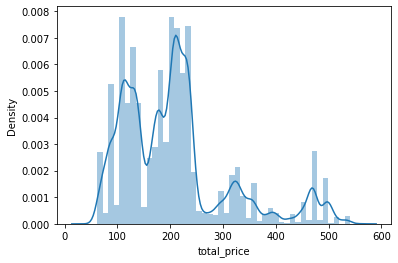

In [61]:
import seaborn as sns
sns.distplot(df['total_price'])

In [62]:
df1['total_price']=np.log1p(df1['total_price'])
df1['base_price']=np.log1p(df1['base_price'])
df1['units_sold'] = np.log1p(df1['units_sold'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


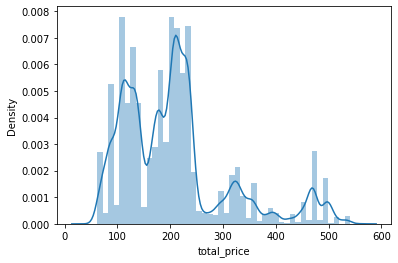

In [63]:
sns.distplot(df['total_price'])

In [64]:
tests = df[df['units_sold'].isna() == True]
trains = df[df['units_sold'].isna() == False]

In [65]:
print(trains.shape,tests.shape)

(150150, 130) (13860, 130)


In [66]:
del tests['units_sold']

In [67]:
trains.corr()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
total_price,1.000000,0.958886,0.050348,-0.065935,-0.235634,NaN,-2.172833e-01,8.482855e-02,-0.079332,0.002057,-0.000498,0.008409,0.001994,0.001957,0.005903,NaN,3.271267e-02,1.589488e-02,3.852164e-03,-2.947038e-02,3.014767e-03,4.918540e-03,2.707229e-02,-1.744686e-02,9.637801e-03,1.106140e-02,1.113170e-02,-5.467454e-04,1.847101e-02,6.022990e-03,4.920304e-03,2.913047e-02,-1.114950e-02,1.665254e-02,7.274820e-03,3.072868e-03,1.999015e-02,-2.016223e-02,-1.615995e-02,1.432888e-02,...,1.937706e-04,-2.371818e-02,-2.068757e-01,-2.775588e-01,-2.745035e-01,-1.941442e-01,4.191152e-02,-1.370955e-01,3.311794e-02,-2.228621e-02,2.395605e-01,5.874615e-02,-2.870047e-02,3.204027e-02,-7.240160e-04,-8.937899e-03,5.301623e-01,4.306780e-01,-2.172433e-01,-8.616303e-02,-1.205799e-02,-4.042689e-02,-1.127929e-02,2.756441e-01,3.682839e-02,-6.576443e-03,-6.469145e-02,1.820555e-01,5.201079e-02,-7.136108e-03,-0.006927,0.006927,-0.014913,0.014913,-0.002261,0.002261,NaN,-0.002261,0.002261,NaN
base_price,0.958886,1.000000,0.214333,0.051909,-0.140032,NaN,-2.172285e-01,8.575782e-02,0.180508,0.003856,-0.001187,0.004700,0.003754,0.003857,0.003859,NaN,3.429082e-02,1.823144e-02,9.768267e-04,-3.043944e-02,2.842536e-03,6.865282e-03,2.417483e-02,-1.941616e-02,1.234430e-02,9.626531e-03,1.007672e-02,2.421854e-03,2.245975e-02,6.653300e-03,4.224822e-03,2.770269e-02,-1.160977e-02,1.841960e-02,1.056475e-02,1.656643e-03,1.843478e-02,-2.143490e-02,-1.567209e-02,1.274332e-02,...,1.257004e-03,-2.466883e-02,-2.153359e-01,-2.811678e-01,-2.784713e-01,-2.022082e-01,3.023406e-02,-1.383419e-01,2.175122e-02,-2.581791e-02,2.215626e-01,5.209532e-02,3.754235e-03,2.249588e-02,2.145920e-03,-1.064505e-02,5.616776e-01,4.568229e-01,-2.208000e-01,-7.136308e-02,-2.586678e-02,-3.467382e-02,-2.388055e-02,2.924752e-01,3.534606e-02,-8.035341e-03,-6.706529e-02,1.834182e-01,5.004455e-02,-8.232814e-03,0.002515,-0.002515,-0.001427,0.001427,0.002249,-0.002249,NaN,0.002249,-0.002249,NaN
is_featured_sku,0.050348,0.214333,1.000000,0.426243,0.337751,NaN,-1.153827e-02,1.184017e-02,0.546044,0.005281,-0.004591,-0.012028,0.004940,0.005518,-0.005490,NaN,-3.082096e-06,-4.884207e-04,2.464432e-03,-8.207756e-03,9.039988e-04,-2.876296e-03,9.192179e-03,1.163066e-03,-1.596306e-03,5.627401e-03,9.059078e-04,5.307918e-04,2.200388e-03,1.239342e-03,7.448595e-03,6.438498e-03,5.061866e-03,1.329385e-03,-1.331444e-03,7.913454e-03,6.018389e-03,-4.281103e-03,-6.689804e-03,8.874483e-03,...,-2.313395e-03,-5.134509e-03,-4.973929e-02,-4.870565e-02,-4.880984e-02,-4.784526e-02,-1.254527e-02,-3.332293e-02,-1.156146e-02,-5.074378e-03,-1.278425e-02,-1.060627e-02,1.031229e-02,2.459470e-02,6.119668e-02,2.109637e-02,1.478538e-01,1.213682e-01,-4.311099e-02,-9.238074e-03,-3.175755e-02,-4.281103e-03,-2.920342e-02,7.758021e-02,-5.721079e-03,-5.546220e-03,-5.399756e-02,1.604796e-02,-8.094336e-03,-1.129871e-02,-0.019447,0.019

In [68]:
X = trains.drop('units_sold',axis = 1)
Y = train['units_sold']

In [69]:
# Perform cross-validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [70]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2,random_state=23)

In [72]:
x_train.isnull().sum()

total_price              0
base_price               0
is_featured_sku          0
is_display_sku           0
count_id_sku_store       0
                        ..
Is_quarter_start_True    0
Is_quarter_end_False     0
Is_year_start_False      0
Is_year_start_True       0
Is_year_end_False        0
Length: 129, dtype: int64

## **Linear Regression**

In [75]:
#linear regression
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)
predict1 = model1.predict(x_valid)

In [77]:
model1.score(x_train, y_train)

0.4963918596256545

**Cross Validation for Linear Regressor**

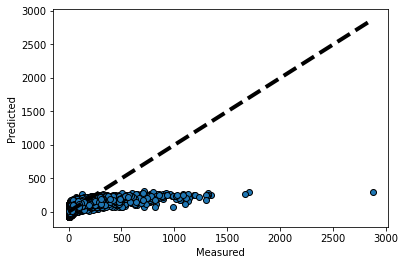

In [87]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
model=linear_model.LinearRegression()

predicted = cross_val_predict(model,x_train,y_train,cv=10)
fig,ax=plt.subplots()
ax.scatter(y_train,predicted,edgecolors=(0,0,0))
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## **Decision Trees**

In [88]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred =regressor.predict(x_valid)

In [89]:
from sklearn.metrics import r2_score
print(f'the decision tree value  :{r2_score(y_valid,y_pred)}')

the decision tree value  :0.6577432169205311


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
model=linear_model.LinearRegression()

predicted = cross_val_predict(model,x_train,y_train,cv=10)
fig,ax=plt.subplots()
ax.scatter(y_train,predicted,edgecolors=(0,0,0))
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()